# Read Data

How to read FISS data.

There are basic four kinds of FISS data:
|type|extension|description|
|---|---|---|
|raw|("...A.fts" or "...B.fts")|raw fits data| 
|proc|("...A1.fts" or "...B1.fts")|processed data|
|comp (eigenvalue)|("...A1_c.fts" or "...B1_c.fts")|PCA compressed data|
|comp (eigenvector)|("...A1_p.fts" or "...B1_p.fts")|Eigenvector of the PCA compressed data|

Usually, the SNU group uses the "comp" data because its size is less than other types, and the noise is suppressed.

You can read the "proc"  or "comp" data using [fisspy.read.FISS]() class.

In [1]:
from fisspy.read import FISS
fileA = '/Users/jhkang/Data/FISS/140603/sunspot/comp/FISS_20140603_165601_A1_c.fts'
fileB = '/Users/jhkang/Data/FISS/140603/sunspot/comp/FISS_20140603_165601_B1_c.fts'
FA = FISS(fileA)
FB = FISS(fileB)

You can call the data and header by calling attribute:

In [2]:
print(FA.data.shape) # (ny, nx, nwv)

(256, 130, 512)


In [3]:
FA.header

SIMPLE  =                    T /  file does conform to FITS standard            
BITPIX  =                   16 /  number of bits per data pixel                 
NAXIS   =                    3 /  number of data axes                           
NAXIS1  =                  512 /  length of data axis 1                         
NAXIS2  =                  256 /  length of data axis 2                         
NAXIS3  =                  130 /  length of data axis 3                         
DATE    = '2014-06-03T16:56:01' /  file creation date (YYYY-MM-DDThh:mm:s       
EXPTIME =                 0.03 /  Second                                        
HBINNING=                    1                                                  
VBINNING=                    2                                                  
GAIN    =                    0 /  Value Range: 0-255                            
STRTIME = '2014.06.03-16:55:43' /  Scan Start Time                              
ENDTIME = '2014.06.03-16:56:

You can correct the stray-light and line asymmetry using [corSLA]() function with reference profile:

In [4]:
refProfile = FA.data[:,1:-1].mean((0,1))
FA.corSLA(refProfile)

You can draw interactive figure as a quick look. For this purpose you have to change the matplotlib backend to show the separate figure. Use "%matplotlib" under IPython kernel or "%matplotlib qt" under Jupyter notebook.

Note 1) For the optimization, we recommand you to use IPython kernel and %matplotlib magic function if you are Mac user.

Note 2) you can omit "%" simbol to call the maginc function.

In [6]:
%matplotlib inline
# this is used for generating the manual please erase this to render this ipynb manual to html file.

In [3]:
%matplotlib qt5

After setting the backend, you can draw the interactive image by using [imshow]() function.

/Users/jhkang/miniforge3/envs/fissdocs/lib/python3.9/site-packages/fisspy/image/interactive_image.py:112: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  helpFig.show()
/Users/jhkang/miniforge3/envs/fissdocs/lib/python3.9/site-packages/fisspy/image/interactive_image.py:187: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


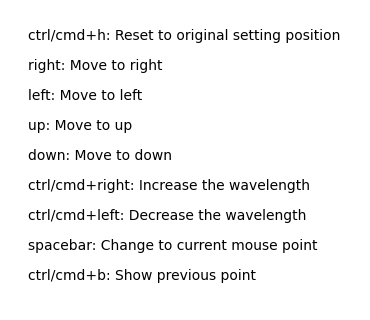

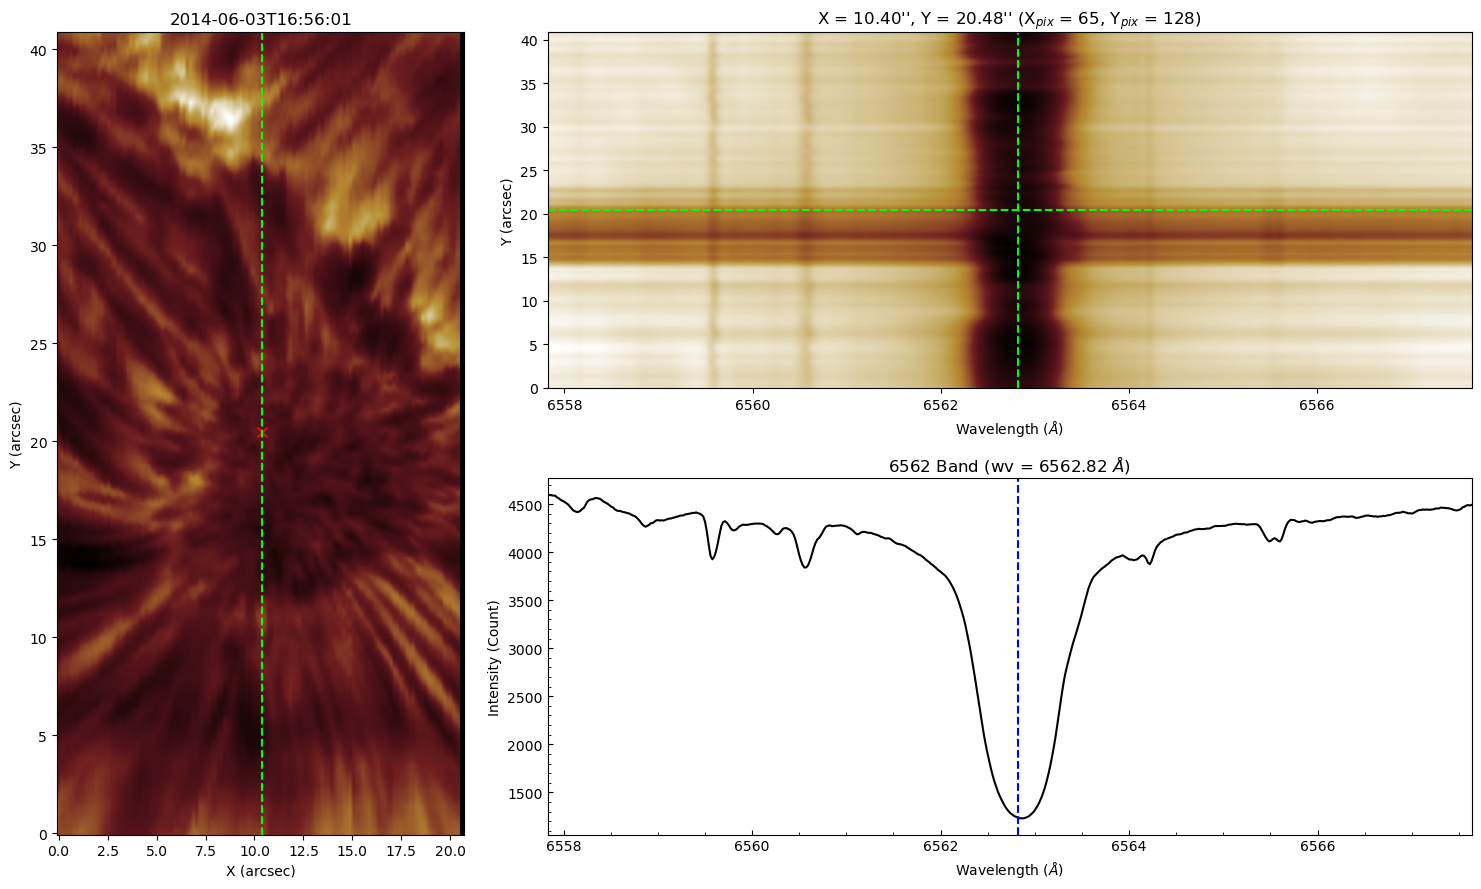

In [7]:
FA.imshow()

Following the help box figure, you can change the wavelength and position.

You can simply dervie the line-of-sight Doppler shift using lambdameter function, and can show the image by using vshow code:

In [9]:
FA.lambdameter(hw=0.1)
print(FA.lv.shape) # line-of-sight velocity
print(FA.lic.shape) # lambdameter intencity

(256, 130)
(256, 130)


/Users/jhkang/miniforge3/envs/fissdocs/lib/python3.9/site-packages/fisspy/read/read_factory.py:615: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


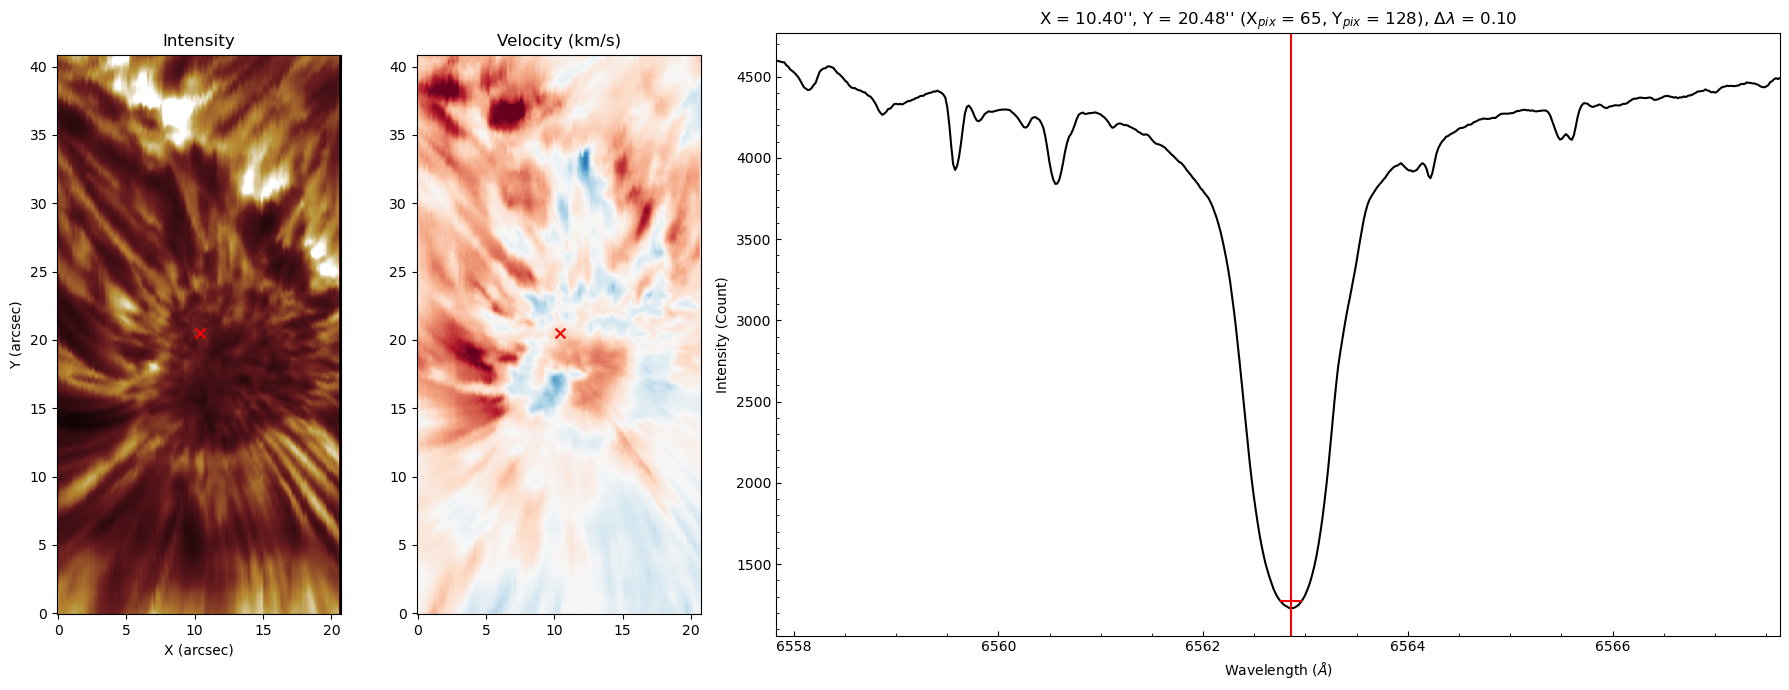

In [10]:
FA.vshow(hw=0.1)

You can handle this figure with the left, right, bottom, top, spacebar, and ctrl/cmd+b. These keys works as imshow interactive keys.

Using the dualBand class on fisspy.image, you can also draw the interactive figure showing two cams.

0


/Users/jhkang/miniforge3/envs/fissdocs/lib/python3.9/site-packages/fisspy/image/interactive_image.py:492: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  helpFig.show()
/Users/jhkang/miniforge3/envs/fissdocs/lib/python3.9/site-packages/fisspy/image/interactive_image.py:577: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  self.fig.show()


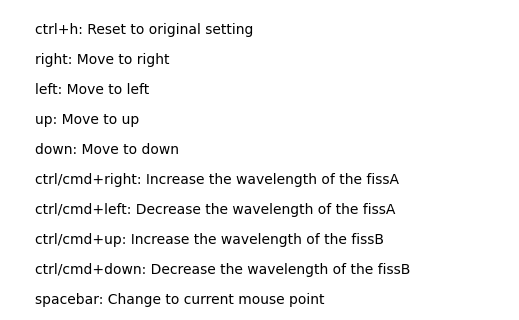

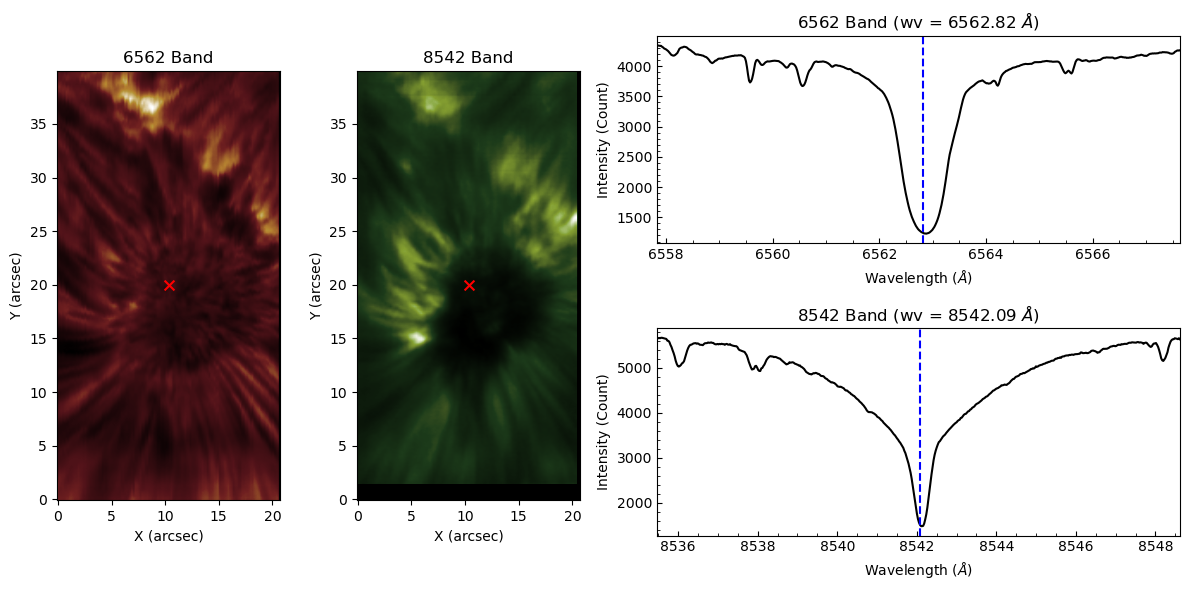

In [11]:
from fisspy.image import dualBand
db = dualBand(FA, FB)